# Detección de Idiomas - Naive Bayes

### Importar librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Cargar el dataset

In [4]:
df = pd.read_csv("../dataset/updated_language_detection.csv")
df.describe()

,Text,Language
count,19813,19813
unique,19813,20
top,aprilie sonda spațială messenger a nasa și-a ...,Thai
freq,1,1000


### Dividir el dataset en conjuntos de entrenamiento y prueba

Se utiliza stratify para mantener la proporción de clases en los conjuntos de entrenamiento y prueba.

In [5]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42, stratify=df['Language'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15850,), (3963,), (15850,), (3963,))

### Convertir texto a Bag of Words

In [6]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Entrenar el modelo

In [7]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

### Evaluar el modelo

In [8]:
y_pred = nb_model.predict(X_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952056522836236

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       199
       Dutch       0.99      1.00      0.99       199
     English       0.97      1.00      0.99       200
    Estonian       1.00      0.98      0.99       200
      French       0.98      1.00      0.99       196
       Hindi       1.00      1.00      1.00       197
  Indonesian       0.99      0.99      0.99       194
      Korean       1.00      0.99      1.00       200
       Latin       0.99      0.96      0.98       190
     Persian       1.00      1.00      1.00       200
   Portugese       0.99      0.99      0.99       199
      Pushto       1.00      1.00      1.00       197
    Romanian       1.00      1.00      1.00       200
     Russian       1.00      0.99      0.99       200
     Spanish       1.00      0.99      1.00       199
     Swedish       1.00      1.00      1.00       197
       Tamil       1.00    

#### Reporte de Clasificación

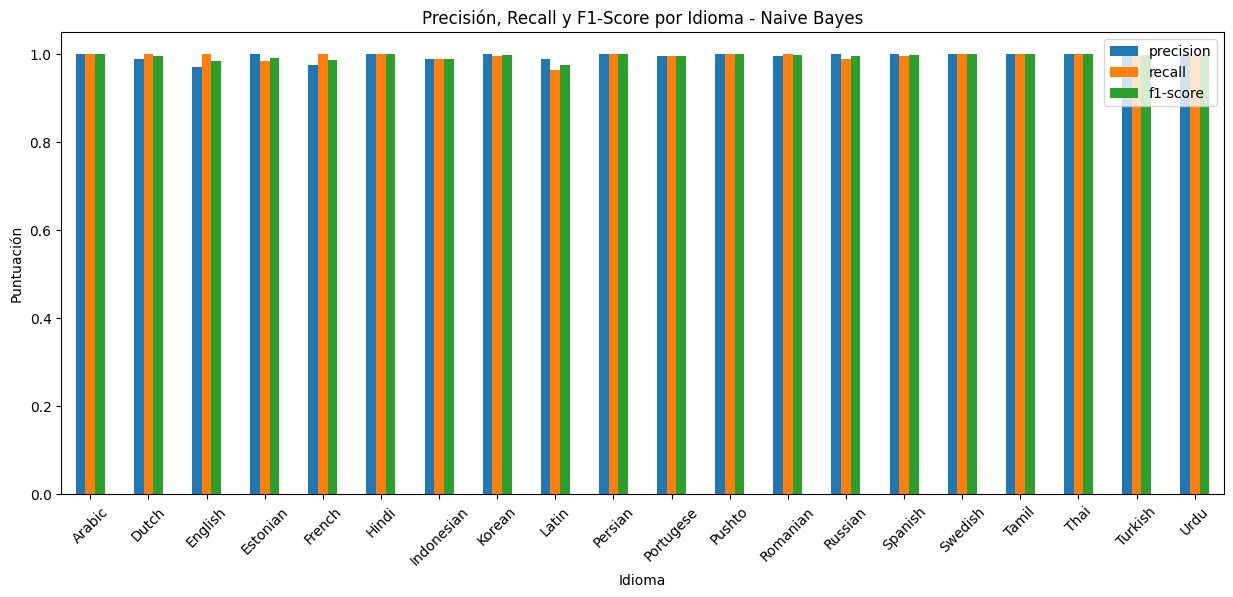

In [9]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T[:-3]

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 6))
plt.title("Precisión, Recall y F1-Score por Idioma - Naive Bayes")
plt.ylabel("Puntuación")
plt.xlabel("Idioma")
plt.xticks(rotation=45)
plt.savefig("../plots/nb_precision_recall_f1.png")
plt.show()

#### Predicciones no acertadas

In [13]:
incorrect_predictions = []

for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]:
        incorrect_predictions.append({
            "Texto": X_test.iloc[i],
            "Predicción": y_pred[i],
            "Idioma Real": y_test.iloc[i]
        })
        print("Texto:", X_test.iloc[i] + "\nPredicción:", y_pred[i], "\nIdioma Real:", y_test.iloc[i], "\n")

df = pd.DataFrame(incorrect_predictions)
df.to_csv('../results/nb_incorrect_predictions.csv', index=False, encoding='utf-8')

Texto: chacón alfonso vitae et res gestae pontificum romanorum et sre cardinalium ab initio nascentis ecclesiae vsque ad clementem ix pom em latim roma tomus tertius
Predicción: Latin 
Idioma Real: Portugese 

Texto:   vilhelmus van best roterodamus misit photographema erasmi miserabiliter iacentis in melissa n° anno p 
Predicción: Dutch 
Idioma Real: Latin 

Texto: stephanus famerie le latin et le grec dappien contribution á létude du lexique dun historien grec de rome genavae droz recensio critica alia recensio critica
Predicción: French 
Idioma Real: Latin 

Texto: johann heinrich zedler carl günther ludovici großes vollständiges universallexikon aller wissenschaften und künste send-si bd sp halle -
Predicción: Dutch 
Idioma Real: Latin 

Texto: inglismaa panga asejuhataja härra ralph kohtunik obadiah konferansjee yokahama tsirkuses sadamaametnik new yorgis 
Predicción: English 
Idioma Real: Estonian 

Texto:  ideen zu einer reinen phänomenologie und phänomenologischen philosophie e

#### Matriz de Confusión

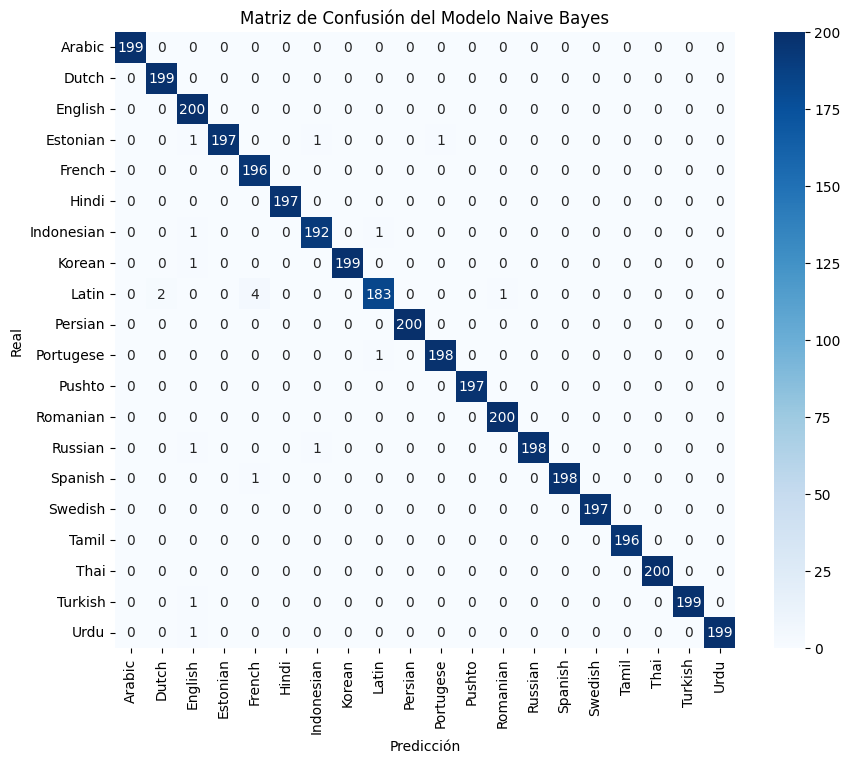

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Matriz de Confusión del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("../plots/nb_confusion_matrix.png")
plt.show()

### Matriz de Confusión Normalizada

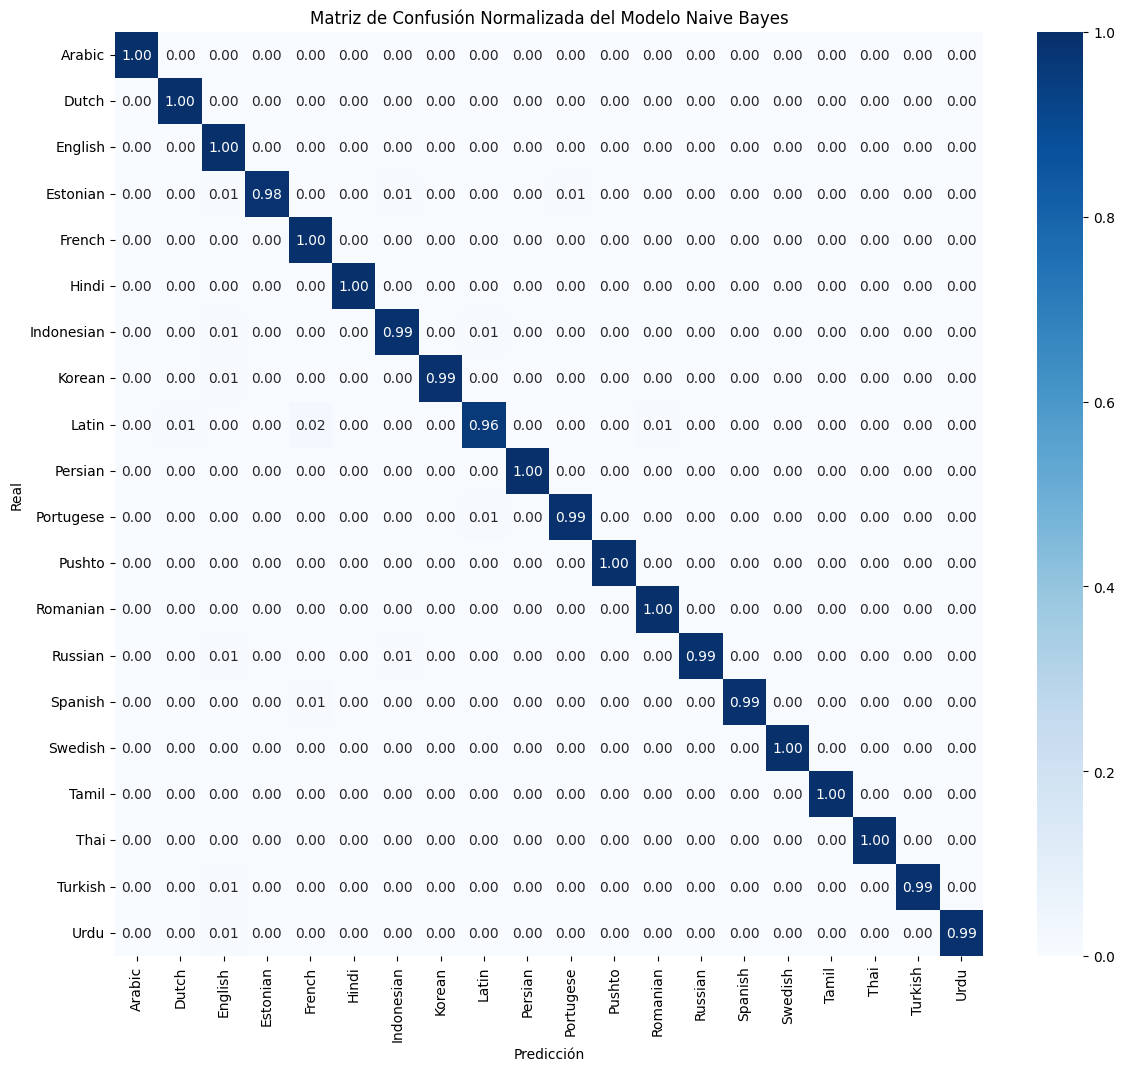

In [12]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Matriz de Confusión Normalizada del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("../plots/nb_confusion_matrix_normalized.png")
plt.show()